In [1]:
import pandas as pd
import numpy as np

#визуализация
import seaborn as sns
import matplotlib.pyplot as plt

#модели
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#модели & метрики & инструменты
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [88]:
#открываем файлы с данными

#данные по Джанкуату
ice_dataset=pd.read_csv('desktop/datasets/djancart.csv',sep=';')
time_data=pd.read_csv('desktop/datasets/djancart.csv',sep=';',index_col=[0], parse_dates=[0],decimal=",")

#данные с метеостанции Клухорский перевал (~71 км)
data_temp=pd.read_csv('desktop/ice_data/temp.csv')            #температура 
data_press=pd.read_csv('desktop/ice_data/press.csv')          #давление 
data_rain=pd.read_csv('desktop/ice_data/rain.csv')            #дней с осадками 
data_rain_mm=pd.read_csv('desktop/ice_data/rain_sum.csv')     #количество осадков в мм
data_wet=pd.read_csv('desktop/ice_data/wet.csv')              #влажность
data_sunny=pd.read_csv('desktop/ice_data/sunny_duration.csv') #продолжительнось солнечных дней в часах
data_snow=pd.read_csv('desktop/ice_data/snow_cover_new.csv')  #высота снежного покрова


In [3]:
ice_dataset.head()

,year,"Accumulation, mm w.e.","Ablation, mm w.e.","Mass balance, mm w.e.","Runoff, mln.cu.m"
0,1872,1200,-2800,-1600,"13,86"
1,1873,1720,-2150,-430,"11,01"
2,1874,1380,-1800,-420,"16,91"
3,1875,1630,-3000,-1370,"14,56"
4,1876,1240,-3500,-2260,"17,60"


In [4]:
#data_temp.drop('Unnamed: 13',axis=1,inplace=True)
#data_temp.columns=[['year','jan','feb','mar','apr','may','jun','jul','avg','sep','okt','nov','dec']]

data_temp.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1961,-5.3,-4.4,-4.1,2.8,9.1,11.5,11.8,12.5,6.3,4.8,1.2,-0.7
1,1962,-3.5,-3.9,1.3,3.0,7.7,10.2,14.7,13.2,10.7,5.7,4.0,-1.1
2,1963,-2.6,-1.6,-4.3,2.5,5.4,8.8,12.1,12.1,9.8,5.3,0.4,-4.0
3,1964,-10.2,-4.4,-1.1,1.3,6.2,11.5,12.0,10.2,9.2,5.7,-0.3,-1.9
4,1965,-5.5,-5.2,-1.3,0.2,6.6,10.3,12.5,13.4,9.5,1.5,0.9,-0.2


In [5]:
#data_press.columns=[['year','jan','feb','mar','apr','may','jun','jul','avg','sep','okt','nov','dec']]
data_press.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1966,18,13,9,16,16,13,6,15,11,3,6,18
1,1967,17,6,11,13,14,19,19,17,12,6,14,20
2,1968,21,10,13,9,9,18,11,13,12,18,10,12
3,1969,7,8,12,13,14,11,13,10,12,16,6,16
4,1970,13,14,13,11,21,12,10,11,14,15,16,12


In [6]:
#data_rain.columns=[['year','jan','feb','mar','apr','may','jun','jul','avg','sep','okt','nov','dec']]
data_rain.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1966,18,13,9,16,16,13,6,15,11,3,6,18
1,1967,17,6,11,13,14,19,19,17,12,6,14,20
2,1968,21,10,13,9,9,18,11,13,12,18,10,12
3,1969,7,8,12,13,14,11,13,10,12,16,6,16
4,1970,13,14,13,11,21,12,10,11,14,15,16,12


In [7]:
data_rain_mm.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1966,239.9,97.5,82.3,179.2,190.7,171.0,176.5,228.2,71.3,24.2,65.4,158.0
1,1967,285.9,22.1,102.5,106.0,128.2,261.6,194.0,184.2,50.1,60.1,134.7,414.1
2,1968,344.1,76.3,252.3,80.5,66.1,114.9,100.6,136.5,176.0,283.8,80.6,94.0
3,1969,42.7,70.0,135.7,83.2,198.4,138.7,134.2,92.7,127.1,206.5,92.3,201.3
4,1970,74.3,357.8,62.7,172.3,222.5,175.4,125.3,152.4,308.5,231.6,188.4,105.9


In [8]:
data_wet.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1966,55,52,49,56,56,57,62,68,65,52,46,60
1,1967,57,49,57,56,61,68,80,73,68,57,63,62
2,1968,59,53,60,60,62,71,66,69,66,64,61,56
3,1969,57,55,61,61,66,58,70,63,62,61,48,61
4,1970,55,56,61,51,61,63,67,70,68,59,55,53


In [9]:
data_sunny.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1966,17,55,126,130,179,186,254,225,192,163,52,20
1,1967,30,79,151,170,165,188,156,182,161,131,35,19
2,1968,23,64,158,175,220,178,240,188,156,86,46,33
3,1969,50,72,114,185,168,231,200,239,175,103,57,19
4,1970,37,66,98,192,174,212,225,207,152,109,24,32


In [10]:
data_snow.drop('Unnamed: 0',axis=1,inplace=True)
data_snow.head()

,year,jan,feb,mar,apr,may,jun,jul,avg,sep,okt,nov,dec
0,1961,29.0,82.0,105.5,83.0,0.0,0.0,0.0,0.0,0.0,0.0,5.5,37.5
1,1962,60.5,93.5,88.0,15.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
2,1963,223.5,218.5,238.0,203.5,60.5,0.0,0.0,0.0,0.0,0.0,4.0,81.0
3,1964,89.5,118.0,112.5,80.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,53.5
4,1965,69.0,117.0,135.0,109.0,19.0,0.0,0.0,0.0,0.0,0.0,51.0,68.0


In [11]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    59 non-null     int64  
 1   jan     59 non-null     float64
 2   feb     59 non-null     float64
 3   mar     59 non-null     float64
 4   apr     59 non-null     float64
 5   may     59 non-null     float64
 6   jun     59 non-null     float64
 7   jul     59 non-null     float64
 8   avg     59 non-null     float64
 9   sep     59 non-null     float64
 10  okt     59 non-null     float64
 11  nov     59 non-null     float64
 12  dec     59 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 6.1 KB


In [12]:
data_press.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    54 non-null     int64
 1   jan     54 non-null     int64
 2   feb     54 non-null     int64
 3   mar     54 non-null     int64
 4   apr     54 non-null     int64
 5   may     54 non-null     int64
 6   jun     54 non-null     int64
 7   jul     54 non-null     int64
 8   avg     54 non-null     int64
 9   sep     54 non-null     int64
 10  okt     54 non-null     int64
 11  nov     54 non-null     int64
 12  dec     54 non-null     int64
dtypes: int64(13)
memory usage: 5.6 KB


In [13]:
data_rain_mm.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    54 non-null     int64 
 1   jan     54 non-null     object
 2   feb     54 non-null     object
 3   mar     54 non-null     object
 4   apr     54 non-null     object
 5   may     54 non-null     object
 6   jun     54 non-null     object
 7   jul     54 non-null     object
 8   avg     54 non-null     object
 9   sep     54 non-null     object
 10  okt     54 non-null     object
 11  nov     54 non-null     object
 12  dec     54 non-null     object
dtypes: int64(1), object(12)
memory usage: 5.6+ KB


In [14]:
data_wet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    54 non-null     int64
 1   jan     54 non-null     int64
 2   feb     54 non-null     int64
 3   mar     54 non-null     int64
 4   apr     54 non-null     int64
 5   may     54 non-null     int64
 6   jun     54 non-null     int64
 7   jul     54 non-null     int64
 8   avg     54 non-null     int64
 9   sep     54 non-null     int64
 10  okt     54 non-null     int64
 11  nov     54 non-null     int64
 12  dec     54 non-null     int64
dtypes: int64(13)
memory usage: 5.6 KB


In [15]:
data_sunny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    55 non-null     int64
 1   jan     55 non-null     int64
 2   feb     55 non-null     int64
 3   mar     55 non-null     int64
 4   apr     55 non-null     int64
 5   may     55 non-null     int64
 6   jun     55 non-null     int64
 7   jul     55 non-null     int64
 8   avg     55 non-null     int64
 9   sep     55 non-null     int64
 10  okt     55 non-null     int64
 11  nov     55 non-null     int64
 12  dec     55 non-null     int64
dtypes: int64(13)
memory usage: 5.7 KB


In [16]:
data_snow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   jan     60 non-null     float64
 2   feb     60 non-null     float64
 3   mar     60 non-null     float64
 4   apr     60 non-null     float64
 5   may     60 non-null     float64
 6   jun     60 non-null     float64
 7   jul     60 non-null     float64
 8   avg     60 non-null     float64
 9   sep     60 non-null     float64
 10  okt     60 non-null     float64
 11  nov     60 non-null     float64
 12  dec     60 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 6.2 KB


In [17]:
#ппропуски в осадках
data_rain=data_rain.fillna(value=0)

temp_columns=data_temp.columns.to_list()
temp_columns.pop(0)


'year'

In [18]:
for item in temp_columns:
    data_temp[item]=data_temp[item].astype('float64')
    data_press[item]=data_press[item].astype('float64')
    data_rain[item]=data_rain[item].astype('int64')
    data_rain_mm[item]=data_rain[item].astype('float64')

In [19]:
#смотрим информацию по файлу
ice_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   149 non-null    int64 
 1   Accumulation, mm w.e.  149 non-null    int64 
 2   Ablation, mm w.e.      149 non-null    int64 
 3   Mass balance, mm w.e.  149 non-null    int64 
 4   Runoff, mln.cu.m       149 non-null    object
dtypes: int64(4), object(1)
memory usage: 5.9+ KB


In [20]:
ice_dataset.columns=['year','accumulation','ablation','mass_balance','runoff']

In [21]:
ice_dataset.head()

,year,accumulation,ablation,mass_balance,runoff
0,1872,1200,-2800,-1600,"13,86"
1,1873,1720,-2150,-430,"11,01"
2,1874,1380,-1800,-420,"16,91"
3,1875,1630,-3000,-1370,"14,56"
4,1876,1240,-3500,-2260,"17,60"


In [22]:
ice_dataset['runoff']=ice_dataset['runoff'].str.replace(',', '.')

In [23]:
ice_dataset['runoff']=ice_dataset['runoff'].astype('float64')

In [24]:
ice_dataset['accumulation'].describe()

count     149.000000
mean     2259.597315
std       659.562590
min       630.000000
25%      1810.000000
50%      2220.000000
75%      2570.000000
max      4000.000000
Name: accumulation, dtype: float64

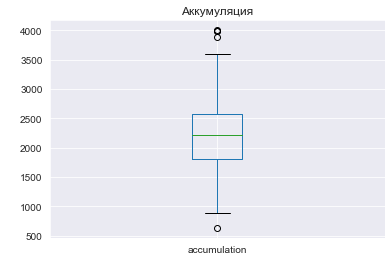

In [25]:
sns.set_style('darkgrid')
plt.title('Аккумуляция')
ice_dataset.boxplot(column='accumulation')
plt.ylabel(' ')
plt.show()

In [26]:
ice_dataset['ablation'].describe()

count     149.000000
mean    -2696.107383
std       580.126630
min     -5530.000000
25%     -3090.000000
50%     -2630.000000
75%     -2300.000000
max     -1340.000000
Name: ablation, dtype: float64

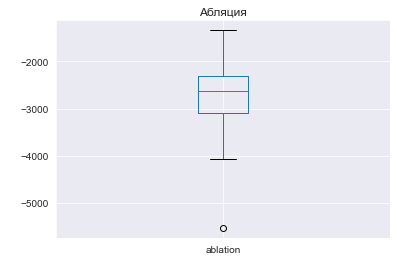

In [27]:
sns.set_style('darkgrid')
plt.title('Абляция')
ice_dataset.boxplot(column='ablation')
plt.ylabel(' ')
plt.show()

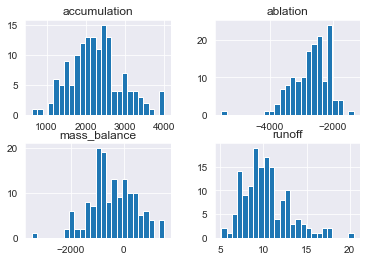

In [28]:
sns.set_style('darkgrid')
ice_dataset[['accumulation','ablation','mass_balance','runoff']].hist(bins=25)
plt.show()

In [29]:
good_dataset=ice_dataset.query('year>1966')
good_dataset.head()

,year,accumulation,ablation,mass_balance,runoff
95,1967,1480,-1340,140,9.62
96,1968,2060,-1960,100,5.65
97,1969,1890,-2980,-1090,10.79
98,1970,2410,-2000,410,8.90
99,1971,2400,-2660,-260,8.91


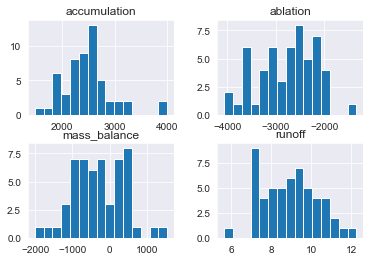

In [30]:
sns.set_style('darkgrid')
good_dataset[['accumulation','ablation','mass_balance','runoff']].hist(bins=15)
plt.show()

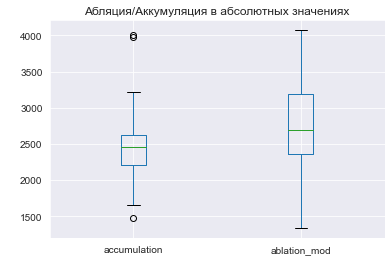

In [31]:
#временный столбец с абсолютным значением
good_dataset['ablation_mod']=abs(good_dataset['ablation'])

sns.set_style('darkgrid')
plt.title('Абляция/Аккумуляция в абсолютных значениях')
good_dataset.boxplot(column=['accumulation','ablation_mod'])
plt.ylabel(' ')
plt.show()

#удаляем временный столбец с абсолютным значением 
good_dataset=good_dataset.drop(['ablation_mod'],axis=1)

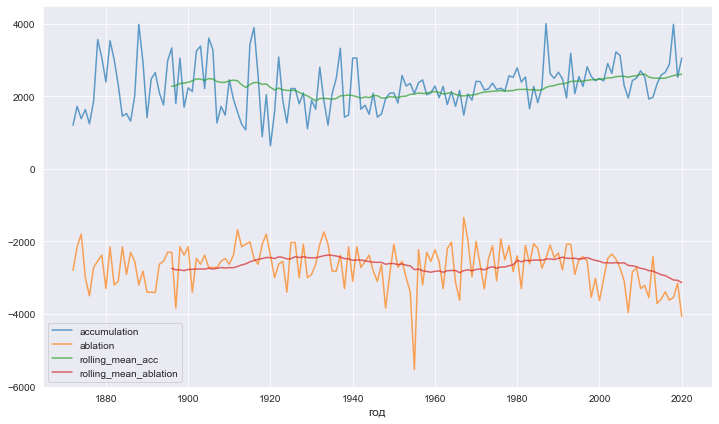

In [32]:
#со скользящим средним для аккумуляции/абляции
ice_dataset['rolling_mean_acc']=ice_dataset['accumulation'].rolling(25).mean()
ice_dataset['rolling_mean_ablation']=ice_dataset['ablation'].rolling(25).mean()

sns.set_style('darkgrid')

ice_dataset[['accumulation','ablation','year','rolling_mean_acc','rolling_mean_ablation']].plot(x='year',alpha=0.7,figsize=(12,7))

plt.xlabel('год', fontsize=12)
#plt.ylabel('Суммарные продажи, млн$', fontsize=12)
#plt.title('Распределение продаж по платформам за актуальный период', fontsize=12)

plt.show()

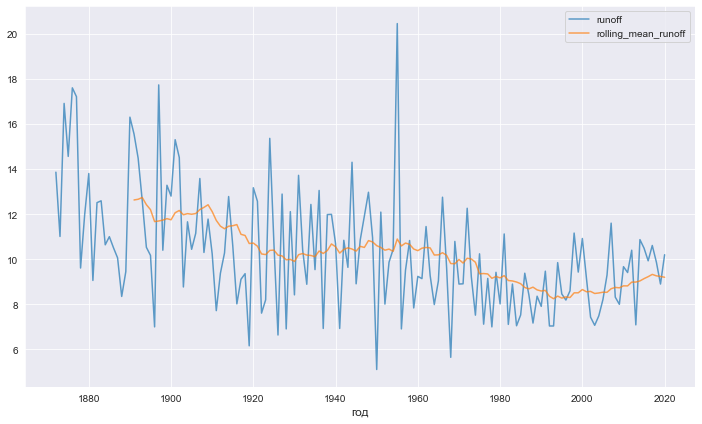

In [33]:
#со скользящим средним для аккумуляции/абляции
ice_dataset['rolling_mean_runoff']=ice_dataset['runoff'].rolling(20).mean()

sns.set_style('darkgrid')

ice_dataset[['year','runoff','rolling_mean_runoff']].plot(x='year',alpha=0.7,figsize=(12,7))

plt.xlabel('год', fontsize=12)
#plt.ylabel('Суммарные продажи, млн$', fontsize=12)
#plt.title('Распределение продаж по платформам за актуальный период', fontsize=12)

plt.show()

In [34]:
ice_dataset.corr().style.background_gradient('ocean') 

,year,accumulation,ablation,mass_balance,runoff,rolling_mean_acc,rolling_mean_ablation,rolling_mean_runoff
year,1.000000,0.186897,-0.176908,0.024497,-0.458936,0.336833,-0.202518,-0.912251
accumulation,0.186897,1.000000,-0.057897,0.734115,-0.367409,0.376480,-0.154253,-0.163163
ablation,-0.176908,-0.057897,1.000000,0.635377,-0.503343,-0.179211,0.326765,0.086491
mass_balance,0.024497,0.734115,0.635377,1.000000,-0.626666,0.153816,0.117431,-0.060428
runoff,-0.458936,-0.367409,-0.503343,-0.626666,1.000000,-0.099255,-0.132087,0.453590
rolling_mean_acc,0.336833,0.376480,-0.179211,0.153816,-0.099255,1.000000,-0.321297,-0.219364
rolling_mean_ablation,-0.202518,-0.154253,0.326765,0.117431,-0.132087,-0.321297,1.000000,-0.183141
rolling_mean_runoff,-0.912251,-0.163163,0.086491,-0.060428,0.453590,-0.219364,-0.183141,1.000000


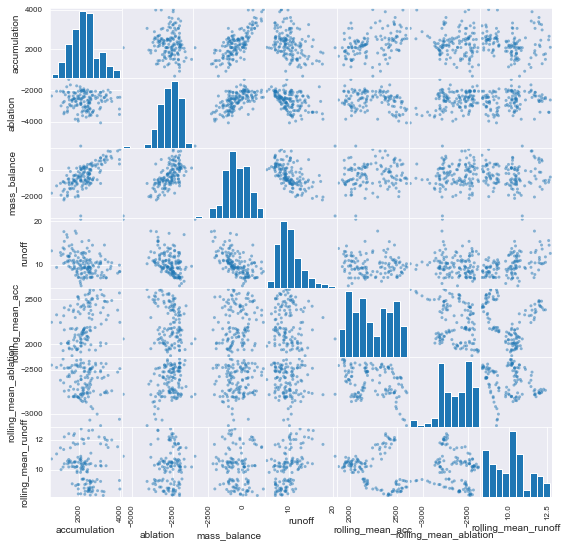

In [35]:
ice_no_year=ice_dataset.drop('year',axis=1)
pd.plotting.scatter_matrix(ice_no_year,figsize=(9,9));

In [36]:
#годы, по которым есть разметка (прямые данные)
true_years_list=good_dataset['year'] 


temp_years_list=data_temp['year']        # температура
press_years_list=data_press['year']      # давление    
rain_years_list=data_rain['year']        # количество дней с осадками       
rain_sum_years_list=data_rain_mm['year'] #количество осадков    
wet_years_list=data_wet['year']          #влажность   
sunny_years_list=data_sunny['year']      #количество солнца
snow_years=data_snow['year']             #снежный покров

#функция для определения что удалять
def what_to_drop(data_list,list_constant,word):
    print(word)
    print((set(list_constant)-set(data_list)),'Каких годов больше в размеченных')
    print((set(data_list)-set(list_constant)),'Удалить из датасета "{}"'.format(word))
    print()

#просмотрим датасеты    
what_to_drop(temp_years_list,true_years_list,'температура')
what_to_drop(press_years_list,true_years_list,'давление')
what_to_drop(rain_years_list,true_years_list,'количество дней с осадками')
what_to_drop(rain_sum_years_list,true_years_list,'количество осадков')
what_to_drop(wet_years_list,true_years_list,'влажность')
what_to_drop(sunny_years_list,true_years_list,'количество солнца')
what_to_drop(snow_years,true_years_list,'снежный покров')

температура
{2020} Каких годов больше в размеченных
{1961, 1962, 1963, 1964, 1965, 1966} Удалить из датасета "температура"

давление
{2020} Каких годов больше в размеченных
{1966} Удалить из датасета "давление"

количество дней с осадками
{2020} Каких годов больше в размеченных
{1966} Удалить из датасета "количество дней с осадками"

количество осадков
{2020} Каких годов больше в размеченных
{1966} Удалить из датасета "количество осадков"

влажность
{2020} Каких годов больше в размеченных
{1966} Удалить из датасета "влажность"

количество солнца
set() Каких годов больше в размеченных
{1966} Удалить из датасета "количество солнца"

снежный покров
set() Каких годов больше в размеченных
{1961, 1962, 1963, 1964, 1965, 1966} Удалить из датасета "снежный покров"



In [37]:
#отрегулирем по годам
good_data_temp=data_temp.query('year>1966')             #температура 
good_data_press=data_press.query('year>1966')           #давление 
good_data_rain=data_rain.query('year>1966')             #дней с осадками 
good_data_rain_mm=data_rain_mm.query('year>1966')       #количество осадков в мм
good_data_wet=data_wet.query('year>1966')               #влажность
good_data_sunny=data_sunny.query('year>1966')           #продолжительнось солнечных дней в часах
good_data_snow=data_snow.query('year>1966')             #снежный покров

#датасет с таргетами
best_ice_dataset=ice_dataset.query('year>1966 and year<2020')

In [38]:
# функция, деляющая признаки по средним
def mean_maker(data):
    data_new=pd.DataFrame()
    data_year=pd.DataFrame()
    data_new['year']=data['year']
    data_year['year']=data['year']
    data_new['wint']=round((data[['jan','feb','dec']].mean(axis=1)),2)
    data_new['spr']=round((data[['mar','apr','may']].mean(axis=1)),2)
    data_new['sum']=round((data[['jun','jul','avg']].mean(axis=1)),2)
    data_new['aut']=round((data[['sep','okt','dec']].mean(axis=1)),2)
    data_year['year_mean']=round((data[['jan','feb','mar','apr','may','jun','jul','avg','sep','okt','nov','dec']].mean(axis=1)),2)
    return(data_new,data_year)
    
    
#распределяем признаки    
feauters_temp,feauters_temp_y=mean_maker(good_data_temp)            #температура 
feauters_press,feauters_press_y=mean_maker(good_data_press)         #давление 
feauters_rain,feauters_rain_y=mean_maker(good_data_rain)            #дней с осадками 
feauters_rain_mm,feauters_rain_mm_y=mean_maker(good_data_rain_mm)   #количество осадков в мм
feauters_wet,feauters_wet_y=mean_maker(good_data_wet)               #влажность
feauters_sunny,feauters_sunny_y=mean_maker(good_data_sunny)         #продолжительнось солнечных дней в часах
feauters_snow,feauters_snow_y=mean_maker(good_data_snow)            #снежный покров

In [39]:
#создадим другие названия столбцов
def columns_maker(word):
    string_columns='year'+' '+'wint_'+word+' '+'spr_'+word+' '+'sum_'+word+' '+'aut_'+word
    string_list=string_columns.split()
    return string_list

#делаем новые заголовки в датасетах с признаками
feauters_temp.columns=columns_maker('temp')            #температура
feauters_press.columns=columns_maker('press')          #давление 
feauters_rain.columns=columns_maker('drain')           #дней с осадками 
feauters_rain_mm.columns=columns_maker('srain')        #количество осадков в мм
feauters_wet.columns=columns_maker('wet')              #влажность
feauters_sunny.columns=columns_maker('sun')            #продолжительнось солнечных дней в часах
feauters_snow.columns=columns_maker('snow')            #высота снежного покрова

#делаем новые заголовки в датасетах с признаками
feauters_temp_y.columns=['year','temp_mean']            #температура
feauters_press_y.columns=['year','press_mean']          #давление 
feauters_rain_y.columns=['year','drain_mean']          #дней с осадками 
feauters_rain_mm_y.columns=['year','srain_mean']        #количество осадков в мм
feauters_wet_y.columns=['year','wet_mean']              #влажность
feauters_sunny_y.columns=['year','sun_mean']            #продолжительнось солнечных дней в часах
feauters_snow_y.columns=['year','snow_mean']            #высота снежного покрова

In [40]:
#соединяем табличку с признаками
total_feauters=feauters_temp.merge(feauters_press, on='year',how='left').merge(feauters_rain, on='year',how='left').merge(feauters_rain_mm, on='year',how='left').merge(feauters_wet, on='year',how='left').merge(feauters_sunny, on='year',how='left').merge(feauters_snow, on='year',how='left')
total_feauters.drop(['sum_snow'],axis=1,inplace=True)

In [41]:
total_feauters.head()
quartal_feauters_corr=total_feauters

In [42]:
#если брать среднее за год
total_years_feauters=feauters_temp_y.merge(feauters_press_y, on='year',how='left').merge(feauters_rain_y, on='year',how='left').merge(feauters_rain_mm_y, on='year',how='left').merge(feauters_wet_y, on='year',how='left').merge(feauters_sunny_y, on='year',how='left').merge(feauters_snow_y, on='year',how='left')
years_feauters_corr=total_years_feauters
total_years_feauters.head()

,year,temp_mean,press_mean,drain_mean,srain_mean,wet_mean,sun_mean,snow_mean
0,1967,3.19,14.00,14.00,14.00,62.58,122.25,46.04
1,1968,4.16,13.00,13.00,13.00,62.25,130.58,65.29
2,1969,4.07,11.50,11.50,11.50,60.25,134.42,23.54
3,1970,4.18,13.50,13.50,13.50,59.92,127.33,41.50
4,1971,4.15,13.33,13.33,13.33,59.00,135.25,32.29


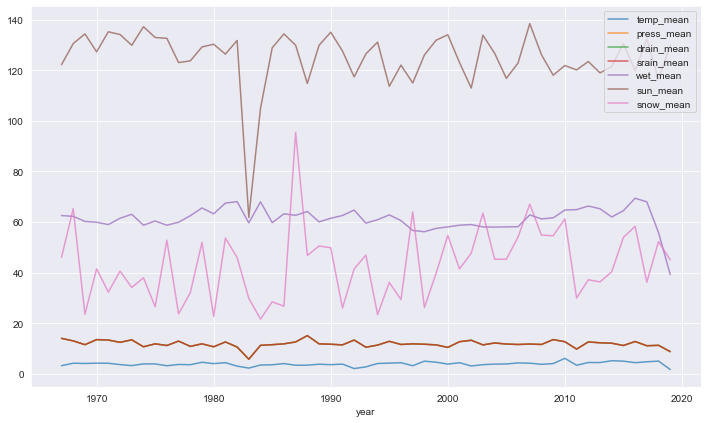

In [43]:
#посмотрим на графиках
total_years_feauters[['temp_mean','press_mean','drain_mean','srain_mean','wet_mean','sun_mean','snow_mean','year']].plot(x='year',alpha=0.7,figsize=(12,7))
plt.show()

In [44]:
#создадим датафрейм с таргетами и актуальными годами
ice_data_target=ice_dataset[['year','mass_balance','runoff','accumulation']].query('year>1966 and year<2020')

#таргеты (обрежем)
target_mass=ice_dataset[['year','mass_balance']].query('year>1966 and year<2020')
target_runoff=ice_dataset[['year','runoff']].query('year>1966 and year<2020')
target_accumulation=ice_dataset[['year','accumulation']].query('year>1966 and year<2020')


#таргеты
target_mass.drop(['year'],axis=1,inplace=True)
target_runoff.drop(['year'],axis=1,inplace=True)
target_accumulation.drop(['year'],axis=1,inplace=True)

#фьючерсы
features_quartal=total_feauters.drop(['year'],axis=1)
features_years=total_years_feauters.drop(['year'],axis=1)

features_years_min=total_years_feauters.drop(['sun_mean'],axis=1).drop(['year'],axis=1).drop(['drain_mean'],axis=1)

print(target_mass.shape)
print(target_runoff.shape)
print(features_quartal.shape)
print(features_years.shape)

(53, 1)
(53, 1)
(53, 27)
(53, 7)


### Корреляция на среднегодовых значениях

In [45]:
#соединяем таблицы с призщнаками за год и таргетами
years_feauters_corr=years_feauters_corr.merge(ice_data_target, on='year',how='left')
years_feauters_corr.head()

,year,temp_mean,press_mean,drain_mean,srain_mean,wet_mean,sun_mean,snow_mean,mass_balance,runoff,accumulation
0,1967,3.19,14.00,14.00,14.00,62.58,122.25,46.04,140,9.62,1480
1,1968,4.16,13.00,13.00,13.00,62.25,130.58,65.29,100,5.65,2060
2,1969,4.07,11.50,11.50,11.50,60.25,134.42,23.54,-1090,10.79,1890
3,1970,4.18,13.50,13.50,13.50,59.92,127.33,41.50,410,8.90,2410
4,1971,4.15,13.33,13.33,13.33,59.00,135.25,32.29,-260,8.91,2400


In [46]:
#смотрим корреляцию
years_feauters_corr.corr()[['runoff','mass_balance','accumulation']].style.background_gradient('ocean')

,runoff,mass_balance,accumulation
year,0.178709,-0.259386,0.351637
temp_mean,0.427862,-0.336272,0.135686
press_mean,-0.040354,0.160901,0.018015
drain_mean,-0.040354,0.160901,0.018015
srain_mean,-0.040354,0.160901,0.018015
wet_mean,0.033102,-0.070629,-0.136570
sun_mean,0.166249,-0.038598,0.085515
snow_mean,-0.081568,0.245524,0.441461
mass_balance,-0.745682,1.000000,0.568789
runoff,1.000000,-0.745682,-0.116827


Итак, если посмотреть на данные последних столбцов, то становится очевидным, что наиболее коррелирующие с целевой переменной <b>mass_balance</b> это:

- средняя температура (-0.34);
- средняя величина снежного покрова (0.25);

Для целевой переменной <b>runoff</b>:
- средняя температура (0.43);
- средняя продолжительность солнечного сияния (0.17);

Для целевой переменной <b>accumulation</b>:
- средняя величина снежного покрова (-0.44)

Попробуем посмотреть на квартальные данные !


### Корреляция на среднеквартальных значениях

In [47]:
#соединим таблицы с квартальными данными
quartal_feauters_corr=quartal_feauters_corr.merge(ice_data_target, on='year',how='left')

In [48]:
quartal_feauters_corr.head()

,year,wint_temp,spr_temp,sum_temp,aut_temp,wint_press,spr_press,sum_press,aut_press,wint_drain,...,wint_sun,spr_sun,sum_sun,aut_sun,wint_snow,spr_snow,aut_snow,mass_balance,runoff,accumulation
0,1967,-5.37,2.53,10.37,4.37,14.33,12.67,18.33,12.67,14.33,...,42.67,162.00,175.33,103.67,116.17,64.67,37.83,140,9.62,1480
1,1968,-4.30,3.27,11.30,4.67,14.33,10.33,14.00,14.00,14.33,...,40.00,184.33,202.00,91.67,129.67,131.50,8.00,100,5.65,2060
2,1969,-3.80,2.50,12.63,3.67,10.33,13.00,11.33,14.67,10.33,...,47.00,155.67,223.33,99.00,40.83,45.00,10.67,-1090,10.79,1890
3,1970,-3.13,4.00,11.50,2.43,13.00,15.00,11.00,13.67,13.00,...,45.00,154.67,214.67,97.67,86.83,66.83,24.00,410,8.90,2410
4,1971,-4.23,3.60,11.90,3.17,10.33,15.67,14.67,13.00,10.33,...,49.00,159.67,208.67,117.67,59.67,58.83,30.67,-260,8.91,2400


In [49]:
top_corr=quartal_feauters_corr.corr()[['runoff','mass_balance','accumulation']].style.background_gradient('ocean')
top_corr

,runoff,mass_balance,accumulation
year,0.178709,-0.259386,0.351637
wint_temp,0.135726,-0.051062,0.239838
spr_temp,0.218230,-0.394153,-0.308718
sum_temp,0.403288,-0.253371,0.194617
aut_temp,0.260943,-0.137054,0.155228
wint_press,-0.170115,0.299383,0.209266
spr_press,0.132761,-0.185718,-0.127201
sum_press,0.027884,0.102468,-0.026599
aut_press,-0.128343,0.242623,0.061108
wint_drain,-0.170115,0.299383,0.209266


Наиболее коррелирующие переменные c показателем <b>runoff</b>:

- spr_temp (0.22)
- sum_temp (0.40)
- aut_temp (0.26)
- aut_wet (0.25)
- sum_sun (0.30)

Наиболее коррелирующие переменные c показателем <b>mass_balance</b>:

- spr_temp (-0.39)
- sum_temp (-0.25)
- wint_press (0.30)
- aut_press (0.24)
- wint_drain (0.30)
- aut_drain (0.24)
- wint_srain (0.30)
- aut_srain (0.24)
- aut_wet (-0.22)
- wint_snow (0.28)
- spr_snow (0.21)

    Наиболее коррелирующие переменные c показателем <b>accumulation</b>:

- wint_temp	(0.24)
- spr_temp	(-0.31)
- wint_wet	(0.36)
- spr_wet	(-0.31)
- spr_sun	-0.33
- wint_snow	(0.44)
- spr_snow	(0.40)


In [50]:
#соберем данные по наиболее коррелирующим переменным для runoff
runoff_feauters_quartal=quartal_feauters_corr[['spr_temp', 'sum_temp', 'wint_press', 'aut_press', 'wint_drain', 'aut_drain', 'wint_srain', 'aut_srain', 'aut_wet', 'wint_snow', 'spr_snow']]
runoff_feauters_quartal.shape

(53, 11)

In [51]:
#соберем данные по наиболее коррелирующим переменным для mass_balance

mass_balance_feauters_quartal=quartal_feauters_corr[['spr_temp','sum_temp', 'aut_temp', 'aut_wet']] 
mass_balance_feauters_quartal.shape

(53, 4)

In [52]:
#соберем данные по наиболее коррелирующим переменным для acuumukation
accumulation_feauters_quartal=quartal_feauters_corr[['wint_temp', 'spr_temp', 'wint_wet', 'spr_wet', 'spr_sun', 'wint_snow', 'spr_snow', 'wint_temp', 'spr_temp']]
accumulation_feauters_quartal.shape

(53, 9)

### Эксперимент на квартальных фьючерсах (выбранные данные)

#### runoff

In [53]:
#Параметры для GridSearchCV
parametrs_rf = {'n_estimators':[1,51],
                'max_depth':[1,21]}

In [54]:
#разобьём данные на тестовую и валидационную выборки в соотношении 80:20
features_train_run, features_test_run, target_train_run, target_test_run = train_test_split(runoff_feauters_quartal, target_runoff, test_size=0.2, shuffle=False)


In [55]:
#обучим линейную регрессию и случайный лес

model_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=12345),scoring='r2',param_grid = parametrs_rf,cv=3)

#обучаем
model_rf.fit(features_train_run,target_train_run)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [1, 21], 'n_estimators': [1, 51]},
             scoring='r2')

In [56]:
#что получилось, лучшие параметры
print('Лучшие параметры моделей')
print('Случайный лес')
print(model_rf.best_estimator_)

Лучшие параметры моделей
Случайный лес
RandomForestRegressor(max_depth=1, n_estimators=51, random_state=12345)


In [57]:
print('Лучшая R2 для случайного леса')
print(model_rf.best_score_)

Лучшая R2 для случайного леса
0.3356407383990064


#### mass balance

In [58]:
#разобьём данные на тестовую и валидационную выборки в соотношении 80:20
features_train_mass, features_test_mass, target_train_mass, target_test_mass = train_test_split(mass_balance_feauters_quartal, target_mass, test_size=0.2)

In [59]:
#обучим линейную регрессию и случайный лес

model_rf_mass = GridSearchCV(estimator=RandomForestRegressor(random_state=12345),scoring='r2',param_grid = parametrs_rf,cv=3)

#обучаем
model_rf_mass.fit(features_train_mass,target_train_mass)

#что получилось, лучшие параметры
print('Лучшие параметры моделей')
print('Случайный лес')
print(model_rf_mass.best_estimator_)

print('Лучшая R2 для случайного леса')
print(model_rf_mass.best_score_)

Лучшие параметры моделей
Случайный лес
RandomForestRegressor(max_depth=1, n_estimators=51, random_state=12345)
Лучшая R2 для случайного леса
0.33285768934099513


#### accumulation

In [67]:
#разобьём данные на тестовую и валидационную выборки в соотношении 80:20
features_train_acc, features_test_acc, target_train_acc, target_test_acc = train_test_split(accumulation_feauters_quartal, target_accumulation, test_size=0.1)

In [68]:
#обучим линейную регрессию и случайный лес

model_rf_acc = GridSearchCV(estimator=RandomForestRegressor(random_state=12345),scoring='r2',param_grid = parametrs_rf,cv=3)

#обучаем
model_rf_acc.fit(features_train_acc,target_train_acc)

#что получилось, лучшие параметры
print('Лучшие параметры моделей')
print('Случайный лес')
print(model_rf_acc.best_estimator_)

print('Лучшая R2 для случайного леса')
print(model_rf_acc.best_score_)

Лучшие параметры моделей
Случайный лес
RandomForestRegressor(max_depth=1, n_estimators=51, random_state=12345)
Лучшая R2 для случайного леса
0.05640317534836662


### Эксперимент на квартальных фьючерсах (выбранные данные)

In [69]:
#Параметры для GridSearchCV
parametrs_rf = {'n_estimators':[1,51],
                'max_depth':[1,21]}

In [70]:
#разобьём данные на тестовую и валидационную выборки в соотношении 80:20
features_train_choice, features_test_choice, target_train_choice, target_test_choice = train_test_split(runoff_feauters_quartal, target_runoff, test_size=0.2)


In [71]:
#обучим линейную регрессию и случайный лес на выбранных данных

model_rf_choice = GridSearchCV(estimator=RandomForestRegressor(random_state=12345),scoring='r2',param_grid = parametrs_rf,cv=5)
#обучаем
model_rf_choice.fit(features_train_choice,target_train_choice)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             param_grid={'max_depth': [1, 21], 'n_estimators': [1, 51]},
             scoring='r2')

In [72]:
#что получилось, лучшие параметры на выбранных данных
print('Лучшие параметры моделей')
print('Случайный лес')
print(model_rf_choice.best_estimator_)

Лучшие параметры моделей
Случайный лес
RandomForestRegressor(max_depth=1, n_estimators=51, random_state=12345)


In [66]:
#лучшая характеристика для модели
print('Лучшая R2 для случайного леса')
print(model_rf_choice.best_score_)

Лучшая R2 для случайного леса
0.4383085373599192
